<a href="https://colab.research.google.com/github/nafrielramadhan/statistics_matplotlib_seaborn/blob/main/statistics_matplotlib_and_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Fakultas Ilmu Komputer, Universitas Indonesia

Questions answered by: Muhammad Nafriel Ramadhan
##**Topic: Statistics, Matplotlib and Seaborn**

</center>


# Exploratory Data Analysis
*Exploratory Data Analysis* atau yang biasa disingkat EDA adalah proses eksplorasi dan analisis dataset untuk melihat pola yang muncul maupun karakteristik utama dari data. EDA adalah sebuah proses dasar yang dapat mempengaruhi keputusan-keputusan seseorang dalam melakukan *data processing, data modelling, dsb* yang akan dilanjutkan di tahapan selanjutnya. Proses *exploratory data analysis* melibatkan dua tahapan utama, yaitu *descriptive statistics* dan *data visualization*.


## Deskripsi "IMDB Movies Dataset"
- `name`: Judul film
- `rating`: Peringkat film berdasarkan kesesuaian dengan segmen penonton tertentu (R, PG, NC-17, dsb)
- `genre`: Genre utama film
- `year`: Tahun film dirilis
- `released`: Tanggal film dirilis (YYYY-MM-DD)
- `score`: Rata-rata nilai film yang diberikan oleh user IMDB
- `votes`: Banyak user IMDB yang memberi nilai terhadap film
- `director`: Sutradara film
- `writer`: Penulis naskah film
- `star`: Pemeran utama film
- `country`: Negara produksi film
- `budget`: Biaya yang dikeluarkan untuk produksi film
- `gross`: Pendapatan kotor dari penayangan film
- `company`: Perusahaan rumah produksi film
- `runtime`: Durasi film (dalam menit)

In [ ]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("movies.csv", index_col=0)

In [ ]:
total_rows, total_attributes = df.shape
print("Jumlah data: ", total_rows)
print("Jumlah atribut: ", total_attributes)

df.head()

Jumlah data:  7665
Jumlah atribut:  14


,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7665 entries, The Shining to Tee em el
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rating    7590 non-null   object 
 1   genre     7665 non-null   object 
 2   year      7665 non-null   int64  
 3   released  7663 non-null   object 
 4   score     7665 non-null   float64
 5   votes     7665 non-null   int64  
 6   director  7665 non-null   object 
 7   writer    7662 non-null   object 
 8   star      7664 non-null   object 
 9   country   7662 non-null   object 
 10  budget    5494 non-null   float64
 11  gross     7479 non-null   float64
 12  company   7650 non-null   object 
 13  runtime   7661 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 898.2+ KB


In [ ]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7665.000000,7665.000000,7.665000e+03,5.494000e+03,7.479000e+03,7661.000000
mean,2000.397782,6.390411,8.810850e+04,3.560912e+07,7.850054e+07,107.260410
std,11.148950,0.968842,1.633238e+05,4.146043e+07,1.657251e+08,18.582606
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.075000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [ ]:
df.describe(include=object)

,rating,genre,released,director,writer,star,country,company
count,7590,7665,7663,7665,7662,7664,7662,7650
unique,12,19,3412,2947,4532,2811,59,2384
top,R,Comedy,"October 4, 1991 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3696,2245,9,38,37,43,5472,377


## Descriptive Statistics
Berikut adalah berbagai pengukuran yang dapat diterapkan untuk statistik deskriptif yang sudah pernah dipelajari sebelumnya di mata kuliah Statistika dan Probabilitas:
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variablity* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quartile
6. Percentile

**Central tendency dapat digunakan untuk melihat distribusi data**. Biasanya, `mean` lebih cocok digunakan untuk distribusi normal (persebaran data simetris di tengah), sementara `median` lebih cocok digunakan untuk melihat distribusi yang *skewed* (condong sebelah). Dan untuk data kategorikal, hanya bisa menggunakan `mode`.

Namun, *central tendency* tidak cukup untuk melihat distribusi data. *Central tendency* tidak dapat menggambarkan tingkat persebaran data. **Measure of dispersion** adalah pengukuran yang dapat digunakan untuk melihat **keberagaman data atau seberapa tinggi persebaran data**. Ada beberapa pengukuran untuk menentukan dispersi data, seperti dengan jangkauan atau `range` maupun simpangan baku atau `standard deviation`

Berikut adalah penggunaan statistik deskriptif (1), (2), (3) dari atribut `Score`:


In [ ]:
score_arr = df["score"].dropna()
stats = [
    ['Mean', np.mean(score_arr)],
    ['Median', np.median(score_arr)],
    ['Mode', scp.mode(score_arr)[0]],
    ['Standard Deviation', np.std(score_arr)],
    ['Variance', np.var(score_arr)],
    ['Minimum', np.min(score_arr)],
    ['Maximum', np.max(score_arr)],
]
pd.DataFrame(stats, columns=['Measure', 'Value'])


,Measure,Value
0,Mean,6.390411
1,Median,6.500000
2,Mode,6.600000
3,Standard Deviation,0.968778
4,Variance,0.938532
5,Minimum,1.900000
6,Maximum,9.300000


Dapat dilihat dari penghitungan statistik deskriptif di atas bahwa `mean` < `median` < `mean`. Data juga tersebar sebesar 0.96 dari nilai `mean`. Dengan nilai maksimum 9.3 dan nilai minimum 1.9, ada kemungkinan bahwa data cenderung lebih padat sedikit ke kanan dari rata-rata.
<br>
Diluar central tendency dan dispersion, penghitungan statistik deskriptif juga termasuk mengukur kemiringan atau asimetri distribusi (`skewness`). `Skewness` dapat mempengaruhi pemrosesan data data, contohnya dalam menangani nilai *null* dengan *central tendency* yang tepat atau melakukan *sampling*.
<br>
*Skewness* juga dapat diperiksa dengan visualisasi `Kernel Density Estimation (KDE) plot`. KDE plot menunjukkan estimasi dari fungsi probabilitas *density* pada sebuah data yang bersifat kontinu.



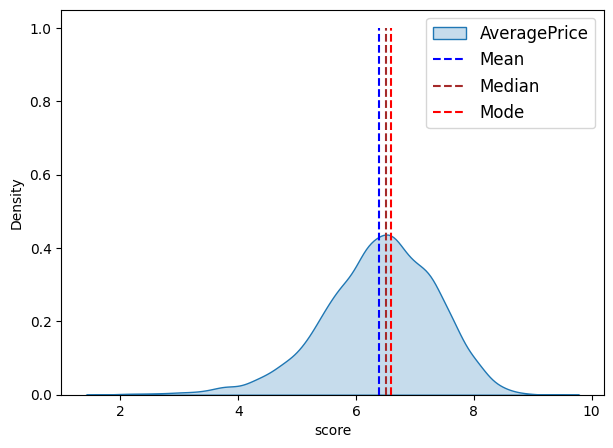

In [ ]:
# KDE Plot (Distribusi data) dari AveragePrice

plt.figure(figsize=(7,5))
sns.kdeplot(score_arr, fill=True)
plt.vlines(x=np.mean(score_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(score_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(score_arr)[0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['AveragePrice', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Terlihat bahwa distribusi cenderung bersifat normal. Berdasarkan visualisasi, mean dapat menjadi pengukuran yang tepat untuk menggambarkan central tendency dari data.

Kita juga dapat memastikan hipotesis tersebut dengan memeriksa nilai *skewness* dari atribut-atribut numerik dengan menggunakan fungsi `.skew()` berikut:

In [ ]:
num_df = df.select_dtypes(include=["float64"])
num_df.skew()

score     -0.604433
budget     2.453241
gross      5.314390
runtime    2.096309
dtype: float64

Berikut ini adalah interpretasi yang dapat digunakan dalam mengambil kesimpulan dari nilai skewness:
- Jika nilai positif, maka right skewed (right-tailed > left-tailed)
- Jika nilai negatif, maka left skewed (left-tailed > right-tailed)
- Jika skewness = 0, maka data simetris.
Dari hasil tersebut, dapat dilihat bahwa atribut `runtime`, `budget`, `gross` memiliki karakteristik right skewed yang cukup tinggi. Sementara `score` cenderung left skewed namun tingkat asimetrisnya rendah sehingga dapat dikategorikan mendekati normal.
<br>
<br>

Untuk membandingkan distribusi dua data, kita dapat menggunakan overlapping Histogram atau KDE plot.
Pada contoh kali ini, kita dapat mencoba melihat perbandingan `budget` pada film dengan rating PG dan R.


In [ ]:
# Memisahkan dataset menjadi Pemain Jerman dan Spanyol
pg_rated = df[df['rating'] == "PG"]
r_rated = df[df['rating'] == "R"]
# Mengambil tingginya
pg_runtime = pg_rated['runtime']
r_runtime = r_rated['runtime']
pg_runtime

name
Star Wars: Episode V - The Empire Strikes Back    124.0
Airplane!                                          88.0
Superman II                                       127.0
Any Which Way You Can                             116.0
The Gods Must Be Crazy                            109.0
                                                  ...  
The Fighting Preacher                             100.0
Onward                                            102.0
Sonic the Hedgehog                                 99.0
Dolittle                                          101.0
The Call of the Wild                              100.0
Name: runtime, Length: 1252, dtype: float64

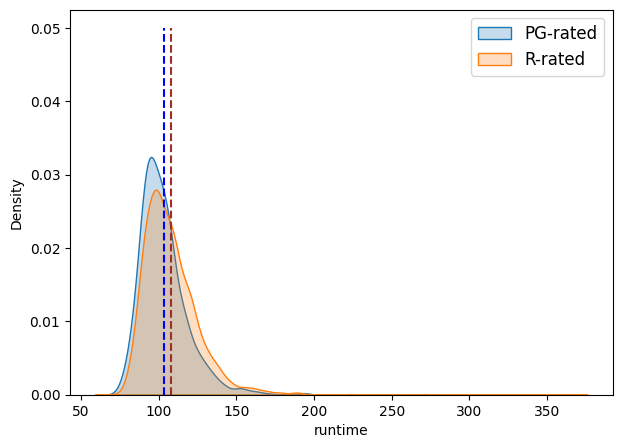

In [ ]:
# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(pg_runtime, fill=True)
sns.kdeplot(r_runtime, fill=True)
plt.legend(['PG-rated','R-rated'], fontsize=12)
plt.vlines(x=pg_runtime.mean(), ymin=0, ymax=0.05, color='blue', linestyle='--')
plt.vlines(x=r_runtime.mean(), ymin=0, ymax=0.05, color='brown', linestyle='--')
plt.show()

## Correlation

Korelasi adalah pengukuran tingkat ketergantungan antar atribut dalam dataset. Korelasi biasanya digunakan untuk mengukur apakah suatu atribut memiliki hubungan yang kuat secara linier atau tidak dengan atribut lainnya.

Seperti yang sudah dipelajari di mata kuliah Statistika dan Probabilitas, terdapat berbagai pilihan jenis korelasi yang dapat digunakan pada jenis data yang berbeda. Salah satunya adalah **Pearson correlation** yang sering digunakan untuk mengukur korelasi atribut numerik. Rata-rata dan varians digunakan dalam menghitung korelasi *pearson*, sehingga sebelum menghtung korelasi, perlu dipastikan bahwa atribut yang terpilih termasuk dalam skala interval atau ratio. Pada dataset ini, atribut dengan skala pengukuran interval adalah `year`, dan atribut dengan skala pengukuran rasio adalah `year`, `score`, `votes`, `budget`, `gross` dan `runtime`.

In [ ]:
df.corr(method='pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.330465,0.257486,0.120785
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.330465,0.076254,0.442429,1.000000,0.740395,0.320623
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120785,0.399451,0.309212,0.320623,0.245216,1.000000


 Selain metode *pearson*, ada metode correlation lain yang juga pernah dipelajari sebelumnya di mata kuliah Statistika dan Probabilitas, yaitu metode `spearman rho`. Perbedaan mendasar dari kedua metode tersebut adalah metode *pearson* dihitung berdasarkan perbedaan antara nilai sebenarnya dan nilai rata-rata, dibagi dengan standar deviasi, sementara metode *spearman* dihitung berdasarkan peringkat (peringkat ordinal) dari nilai setiap variabel. Karena penghitungan dengan `pearson` menggunakan rata-rata dan varians, maka skala pengukuran atributnya harus dipastikan interval dan ratio. Sementara itu, penghitungan `spearman rho` menggunakan rank, sehingga `spearman rho` dapat juga mengukur korelasi dari atribut dengan skala pengukuran ordinal.

In [ ]:
df.corr(method='spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.319448,0.293084,0.142895
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.319448,-0.001403,0.502466,1.000000,0.693670,0.336932
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142895,0.399857,0.290159,0.336932,0.246243,1.000000


Dari tabel koefisien korelasi pearson, kita dapat melihat pasangan atribut apa saja yang memiliki tingkat dependensi yang tinggi. Korelasi tertinggi dengan metode *pearson* adalah `budget` dan `gross`, sementara untuk metode *spearman* adalah `gross` dan `votes`. Untuk membuktikan, kita dapat melakukan visualisasi `scatter plot` dari psalah satu dari pasangan atribut tersebut.

<Axes: xlabel='gross', ylabel='budget'>

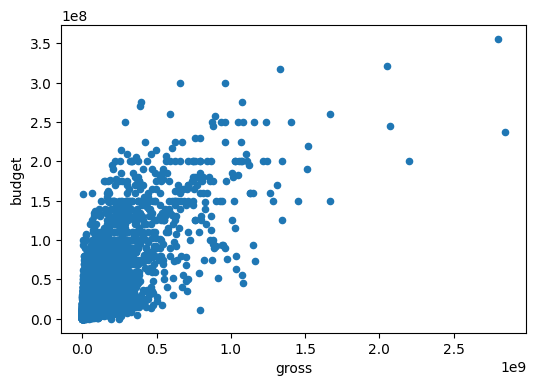

In [ ]:
# Membuat scatterplot untuk value_euro terhadap overall_rating
df.plot.scatter(x="gross", y="budget", figsize=(6,4))

Dapat dilihat dari visualisasi scatter plot menunjukkan bahwa ada hubungan positif antara "budget" dan "gross" pada data yang digunakan. Dalam visualisasi scatter plot di atas, terlihat bahwa sebaran titik data yang cenderung membentuk pola diagonal ke kanan atas. Artinya, semakin tinggi nilai `budget`, maka nilai `gross` cenderung semakin tinggi.


## Data Visualization


### Melihat jumlah film dari setiap rating category


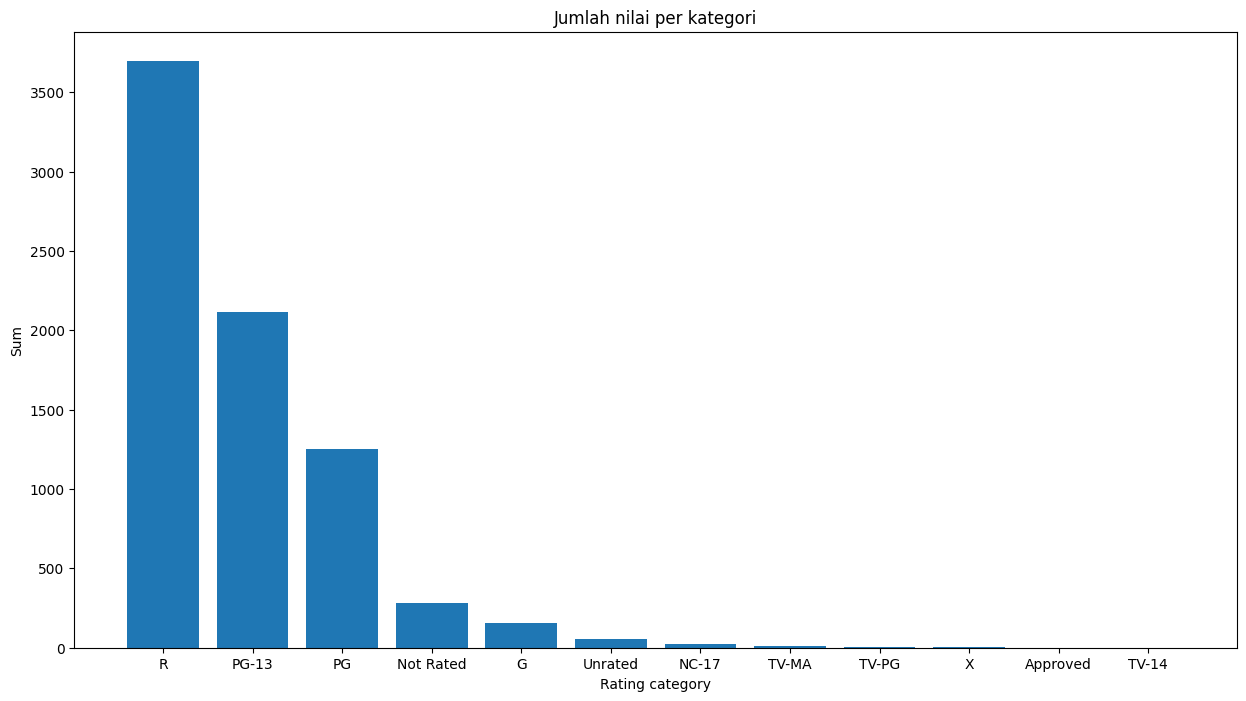

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah nilai setiap kategori
jumlah_per_kategori = df['rating'].value_counts()

plt.figure(figsize=(15,8))
# Membuat bar chart
plt.bar(jumlah_per_kategori.index, jumlah_per_kategori.values)

# Menambahkan label pada sumbu x dan y serta judul
plt.xlabel('Rating category')
plt.ylabel('Sum')
plt.title('Jumlah nilai per kategori')

# Menampilkan plot
plt.show()


Dari bar chart di atas, dapat dilihat bahwa atribut `rating_category` memiliki data yang tidak seimbang, dimana lebih banyak film memiliki rating R, PG-13 dan PG dibanding kategori rating lainnya.

### Melihat jumlah film dari setiap genre

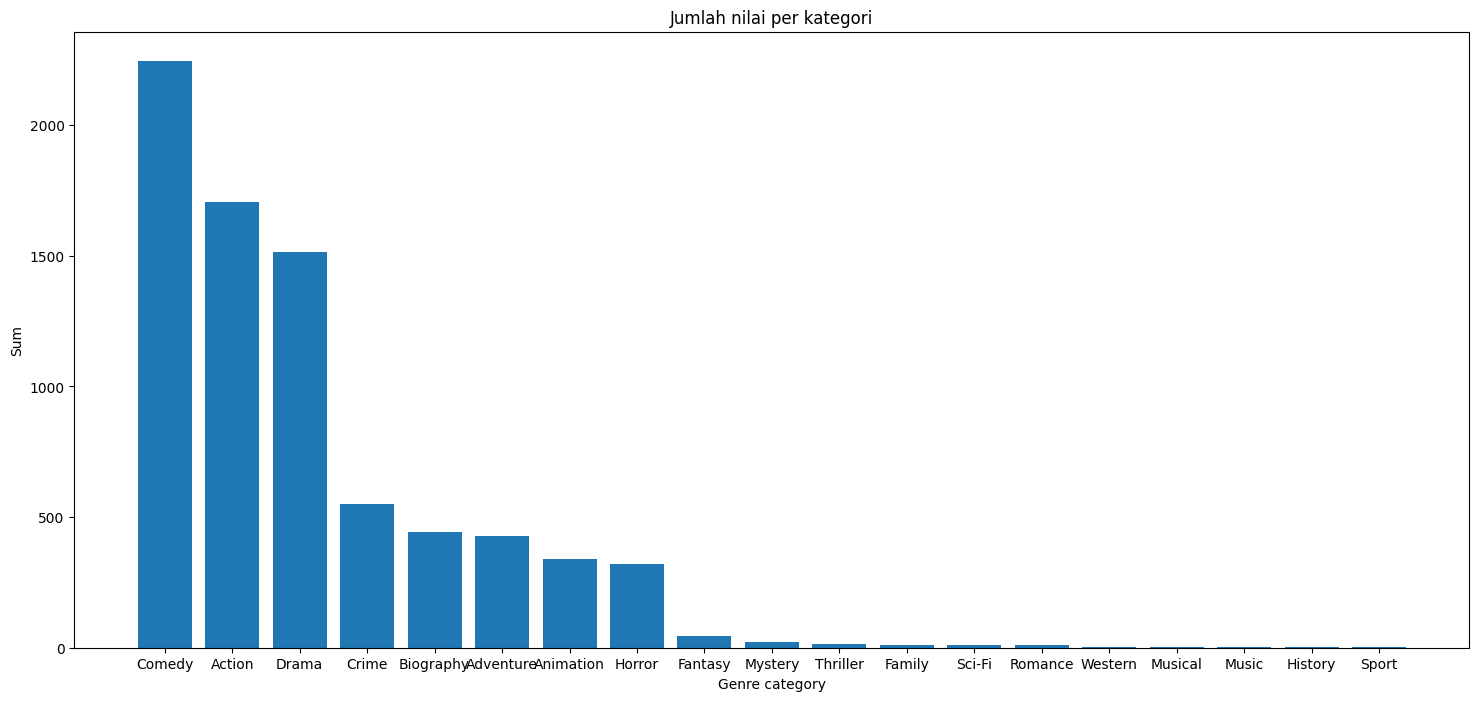

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah nilai setiap kategori
jumlah_per_kategori = df['genre'].value_counts()

plt.figure(figsize=(18,8))
# Membuat bar chart
plt.bar(jumlah_per_kategori.index, jumlah_per_kategori.values)

# Menambahkan label pada sumbu x dan y serta judul
plt.xlabel('Genre category')
plt.ylabel('Sum')
plt.title('Jumlah nilai per kategori')

# Menampilkan plot
plt.show()


Dapat dilihat bahwa genre dengan jumlah film paling banyak di dataset adalah Comedy, Action dan Drama. Sementara itu, genre dengan jumlah film paling sedikit di dataset adalah Music, History dan Sport.

### Menampilkan boxplot Score terhadap Genre

<Axes: xlabel='genre', ylabel='score'>

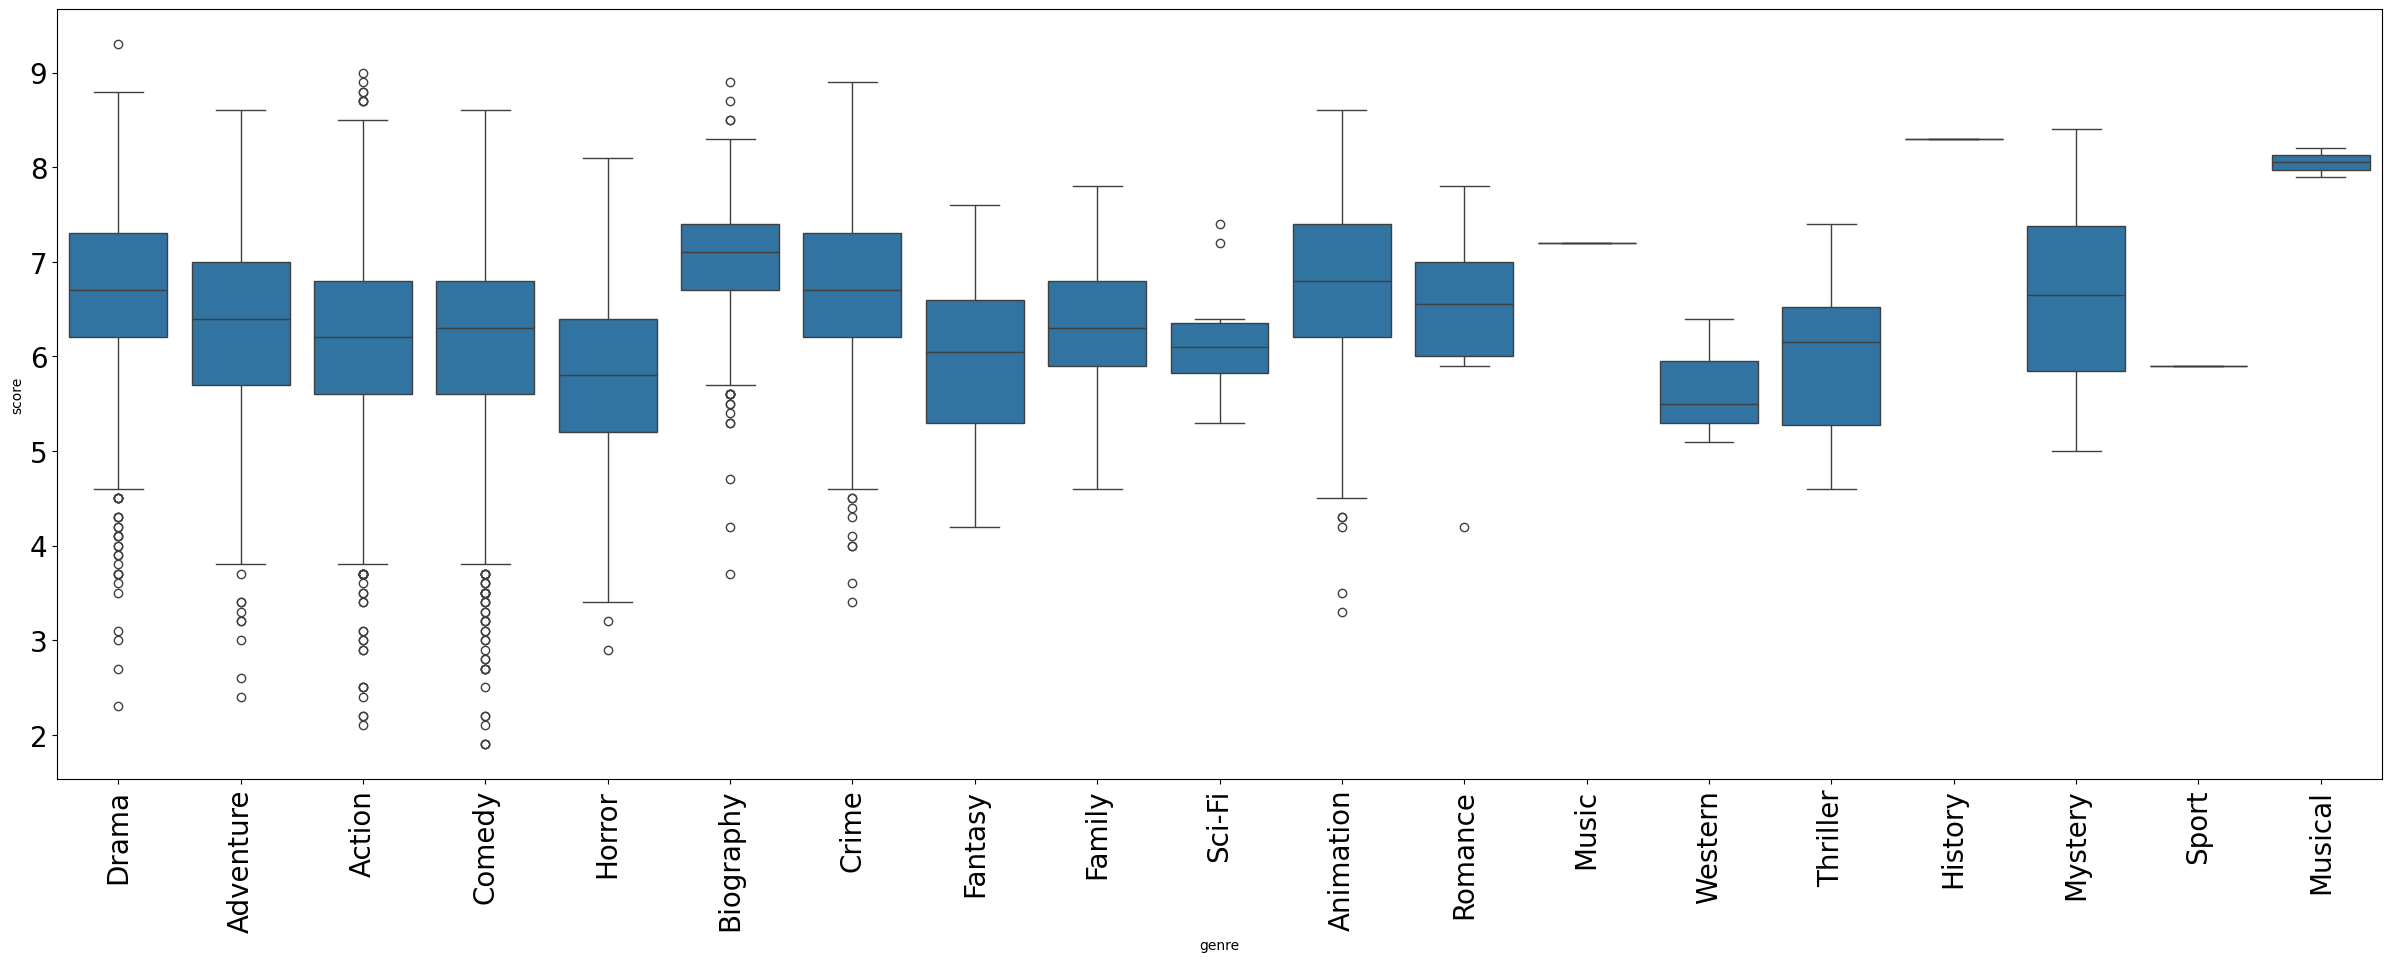

In [ ]:
# Menampilkan boxplot Score terhadap Genre
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='genre', y='score')

# Soal


### **SOAL 1: Descriptive Statistics**

#### 1a. Tampilkan descriptive statistics dari atribut `votes` beserta dengan range, Q1, Q2 dan Q3-nya!

In [ ]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

df = pd.read_csv("movies.csv")

# Membuat deskripsi statistik
vote_arr = df["votes"].dropna()
stats = [
    ['Mean', np.mean(vote_arr)],
    ['Median', np.median(vote_arr)],
    ['Mode', scp.mode(vote_arr)[0]],
    ['Standard Deviation', np.std(vote_arr)],
    ['Variance', np.var(vote_arr)],
    ['Minimum', np.min(vote_arr)],
    ['Maximum', np.max(vote_arr)],
    ['Range', np.max(vote_arr) - np.min(vote_arr)],
    ['Q1', np.percentile(vote_arr, 25)],
    ['Q2', np.percentile(vote_arr, 50)],
    ['Q3', np.percentile(vote_arr, 75)]
]
pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,8.810850e+04
1,Median,3.300000e+04
2,Mode,1.300000e+04
3,Standard Deviation,1.633131e+05
4,Variance,2.667117e+10
5,Minimum,7.000000e+00
6,Maximum,2.400000e+06
7,Range,2.399993e+06
8,Q1,9.100000e+03
9,Q2,3.300000e+04


> Tulis jawaban di sini.

#### 1b. Apa central tendency yang paling cocok digunakan untuk atribut `runtime`? Berikan alasan!

              Measure       Value
0                Mean  107.260410
1              Median  104.000000
2                Mode   97.000000
3  Standard Deviation   18.581393
4            Variance  345.268174
5             Minimum   55.000000
6             Maximum  366.000000


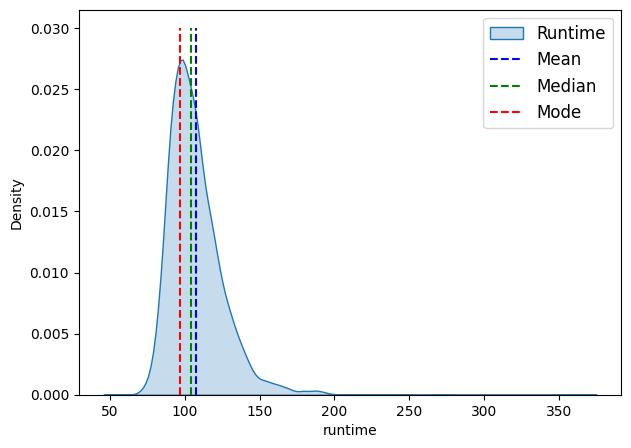

score     -0.604433
budget     2.453241
gross      5.314390
runtime    2.096309
dtype: float64

In [ ]:
# Statistik deskriptif dari atribut Runtime
runtime_arr = df["runtime"].dropna()
stats = [
    ['Mean', np.mean(runtime_arr)],
    ['Median', np.median(runtime_arr)],
    ['Mode', scp.mode(runtime_arr)[0]],
    ['Standard Deviation', np.std(runtime_arr)],
    ['Variance', np.var(runtime_arr)],
    ['Minimum', np.min(runtime_arr)],
    ['Maximum', np.max(runtime_arr)],
]
print(pd.DataFrame(stats, columns=['Measure', 'Value']))

# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(runtime_arr, fill=True)
plt.vlines(x=np.mean(runtime_arr), ymin=0, ymax=0.03, color='blue', linestyle='--')
plt.vlines(x=np.median(runtime_arr), ymin=0, ymax=0.03, color='green', linestyle='--')
plt.vlines(x=scp.mode(runtime_arr)[0], ymin=0, ymax=0.03, color='red', linestyle='--')
plt.legend(['Runtime', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

num_df = df.select_dtypes(include=["float64"])
num_df.skew()

Dilihat dari deskripsi statistik, nilai Mean > Median > Mode. Data tersebar sebesar 18.581 dari nilai mean (mengacu pada standar deviasi). Dengan Nilai minimum 55.0 dan nilai maksimum 366.0. Hal ini menandakan ada kemungkinan bahwa data cenderung lebih padat ke kanan dari rata-rata karena jarak antara nilai maksimum dan mean lebih besar daripada jarak antara nilai minimum dan mean.

Berdasarkan KDE Plot (distribusi data), kita bisa melihat bahwa data terdistribusi secara tidak normal (asimetri).

Setelah dipastikan lagi dengan memeriksa nilai skewness, atribut runtime memiliki nilai skewness yang positif, yaitu: 2.096309. Hal tersebut menandakan bahwa data pada atribut runtime tersebar secara right skewed. Oleh karena itu, central tendency yg cocok digunakan untuk atribut runtime adalah Median.

#### 1c. Buatlah heatmap dengan korelasi Pearson dari dataset `movies.csv`, berikan analisis dan *insight* yang kamu peroleh dari heatmap tersebut!

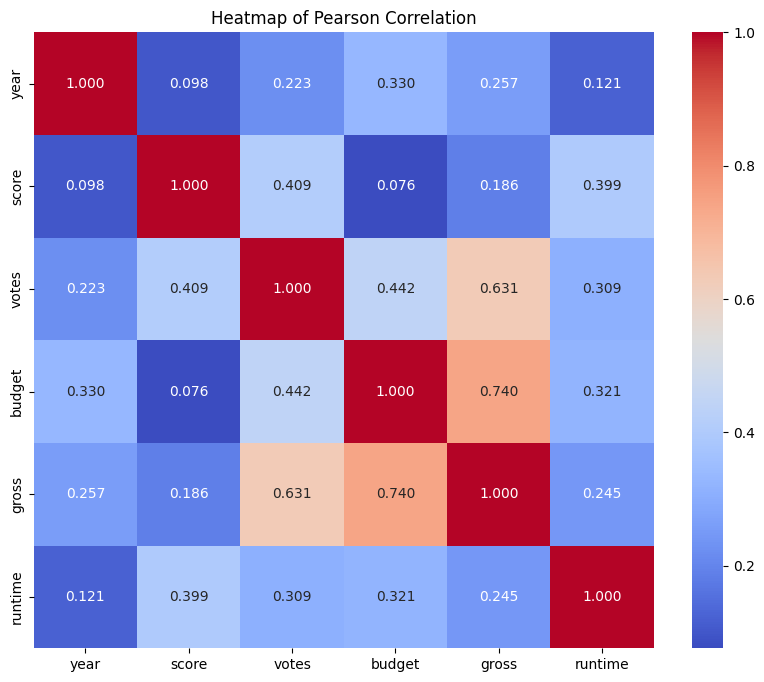

In [ ]:
correlation_matrix = df.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Heatmap of Pearson Correlation')
plt.show()

Berdasarkan heatmap korelasi Pearson antar atribut di atas.
Korelasi antara atribut gross dan budget memiliki nilai yang tertinggi, yaitu 0.740 dan memiliki warna yang paling mendekati merah gelap.
Hal tersebut menandakan bahwa atribut yang memiliki korelasi tertinggi dengan metode Pearson adalah budget dan gross.

Sedangkan, korelasi antara atribut budget dan score memiliki nilai yang ter-rendah, yaitu 0.076 dan memiliki warna yang paling mendekati biru gelap.
Hal tersebut menandakan bahwa atribut yang memiliki korelasi ter-rendah dengan metode Pearson adalah budget dan score.

### **SOAL 2: Data Visualization**

Untuk setiap sub-soal, pilih salah satu dari visualisasi berikut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* KDE plot
* Bubble plot

Beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan.

**Secara eksplisit, tulis chart apa yang Anda pilih dan alasannya.**

#### 2a. Buatlah visualisasi untuk melihat jumlah rata-rata  `score` film tiap `genre`. Apakah genre Horror termasuk lima film dengan rata-rata score tertinggi? Tulis chart apa yang kamu pilih dan alasannya.

<ipython-input-22-64d3bcc30658>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_score.values, y=rata_score.index, palette='plasma')


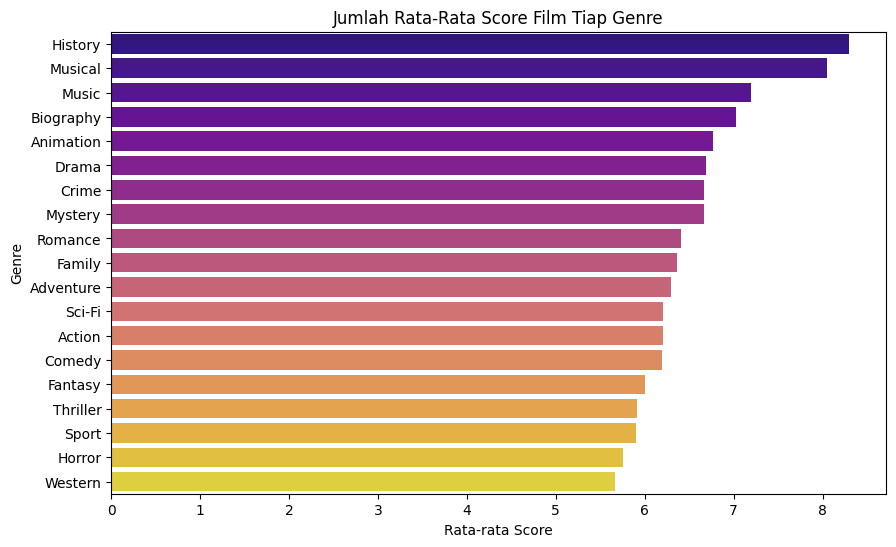

Genre Horror tidak termasuk lima film dengan rata-rata score tertinggi.


In [ ]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

df = pd.read_csv("movies.csv")

# Menghitung jumlah rata-rata score dari setiap genre
rata_score = df.groupby('genre')['score'].mean().sort_values(ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=rata_score.values, y=rata_score.index, palette='plasma')
plt.xlabel('Rata-rata Score')
plt.ylabel('Genre')
plt.title('Jumlah Rata-Rata Score Film Tiap Genre')
plt.show()

# Mengecek apakah genre Horror termasuk lima film dengan rata-rata score tertinggi
lima_genre_terbaik = rata_score.head()
if 'Horror' in lima_genre_terbaik.index:
    print("Genre Horror termasuk lima film dengan rata-rata score tertinggi.")
else:
    print("Genre Horror tidak termasuk lima film dengan rata-rata score tertinggi.")


Saya memilih untuk menggunakan bar graph karena bar graph sangat cocok dengan data yang bersifat kategorikal (seperti genre film). masing-masing bar pada bar graph ini mewakili 1 genre dan tinggi bar tersebut mewakili jumlah rata-rata score untuk genre tersebut. Hal tersebut mempermudah pembaca untuk mengidentifikasi dan membandingkan masing-masing genre dengan jumlah rata-rata score-nya.

Ditambah dengan urutan tertinggi berada di paling atas bar graph yang dapat mempermudah pembaca untuk menjawab pertanyaan terkait 5 film dengan rata-rata skor tertinggi. Sehingga kita bisa menentukan bahwa genre Horror tidak termasuk 5 film dengan rata-rata score tertinggi.



#### 2b. Buatlah visualisasi *tren* rata-rata `gross` film pertahun. Visualisasi apa yang cocok digunakan? Berikan alasan. Selain itu, berikan *insight* yang dapat kamu peroleh dari visualisasi yang telah kamu buat. Tuliskan juga chart apa yang kamu pilih dan alasannya.

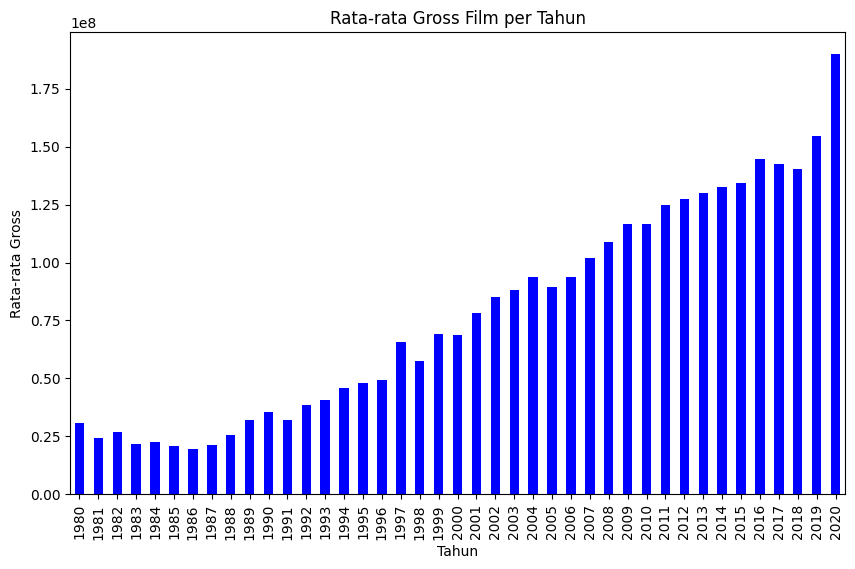

In [ ]:
# Plotting histogram
rata_gross_tahun = df.groupby('year')['gross'].mean()

# Membuat plot
plt.figure(figsize=(10, 6))
rata_gross_tahun.plot(kind='bar', color='b')

# Menambahkan judul dan label pada sumbu
plt.title('Rata-rata Gross Film per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Gross')

# Menampilkan plot
plt.show()

Saya pilih menggunakan bar graph karena dengan menggunakan bar graph kita dapat melihat apakah rata-rata gross film mengalami peningkatan atau penurunan dari tahun ke tahun sehingga mempermudah pembaca untuk melihat perbandingan antara rata-rata gross film untuk setiap tahun-nya . Dengan melihat bar tersebut juga kita bisa dapat mengidentifikasi tahun-tahun di mana rata-rata gross film mencapai puncaknya (ditandai dengan bar tertinggi) atau mencatat kinerja terburuk (ditandai dengan bar ter-rendah).

Beberapa insight yang saya peroleh:
- Tahun dengan rata-rata gross ter-rendah berada pada tahun 1986.
- Tahun dengan rata-rata gross tertinggi berada pada tahun 2020.
- Peningkatan terbesar terjadi pada tahun 2019 ke tahun 2020.
- Penurunan terbesar terjadi pada tahun 1997 ke tahun 1998.
- Secara keseluruhan rata-rata gross selalu mengalami peningkatan yang konsisten (lebih banyak peningkatan dari pada penurunan) setiap tahun-nya dari tahun 1980-2020

#### 2c. Buatlah visualisasi yang menunjukkan perbandingan **persentase jumlah film dengan score dalam rentang 8.5 sampai 10 tiap negara terhadap seluruh film dalam rentang 8.5 sampai 10.** (Contoh: Misalkan India punya 5 film yang punya score dalam rentang 8.5 sampai 10, dan ada 100 film di dataset yang punya score di rentang 8.5 sampai 10, maka persentase india adalah 5%. Anda perlu menentukan persentase untuk setiap negara yang memiliki film dalam rentang 8.5 sampai 10 tersebut, dan tampilkan visualisasinya). Berapa **persentase** film yang berasal dari Perancis?

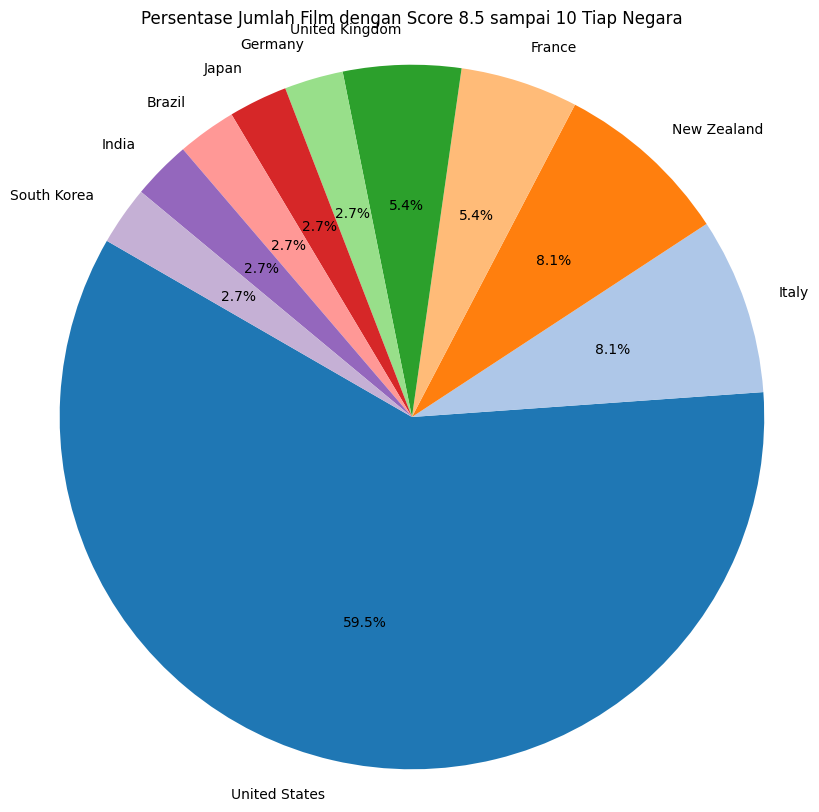

Persentase film dalam rentang 8.5 sampai 10 yang berasal dari Perancis: 5.405405405405405


In [ ]:
import matplotlib.pyplot as plt

# Filter data untuk film dengan score dalam rentang 8.5 sampai 10
filteredfilms_df = df[(df['score'] >= 8.5) & (df['score'] <= 10)]

# Menghitung jumlah film dari setiap negara dalam rentang 8.5 sampai 10
jumlahfilm_negara_filtered = filteredfilms_df['country'].value_counts()

# Menghitung total jumlah film dalam rentang 8.5 sampai 10
total_filteredfilms = len(filteredfilms_df)

# Menghitung persentase film dari setiap negara terhadap total jumlah film dalam rentang 8.5 sampai 10
persentase_negara = (jumlahfilm_negara_filtered / total_filteredfilms) * 100

# Menampilkan visualisasi perbandingan persentase tersebut menggunakan pie chart
plt.figure(figsize=(10, 10))
plt.pie(persentase_negara, labels=persentase_negara.index, autopct='%1.1f%%', startangle=150, colors=plt.cm.tab20.colors)
plt.title('Persentase Jumlah Film dengan Score 8.5 sampai 10 Tiap Negara')
plt.axis('equal')
plt.show()

# Menampilkan persentase film yang berasal dari Perancis
print("Persentase film dalam rentang 8.5 sampai 10 yang berasal dari Perancis:", persentase_negara['France'])


Saya memilih untuk menggunakan pie chart karena cocok untuk memperlihatkan proporsi relatif dari setiap bagian terhadap keseluruhan (100%), dalam konteks di soal ini kita dapat melihat proporsi persentase film dengan score dalam rentang 8.5 sampai 10 dari setiap negara terhadap total keseluruhan film dalam rentang tersebut.

Dengan menggunakan pie chart kita juga bisa dengan mudah membandingkan proporsi persentasi setiap negara, melihat persentase yang sama antar negara, melihat persentase terbesar dan terkecil. Dari pie chart tersebut kita bisa lihat film yang berasal dari Perancis memiliki persentase sebesar 5.4%

#### 2d. Buatlah visualisasi untuk melihat apakah ada **outliers** pada atribut `runtime` untuk setiap genre dari film yang berasal dari negara United Kingdom. Apakah outlier yang ada pada visualisasi dapat dikatakan sebagai outliers yang valid? Berikan pendapat dan analisis Anda.

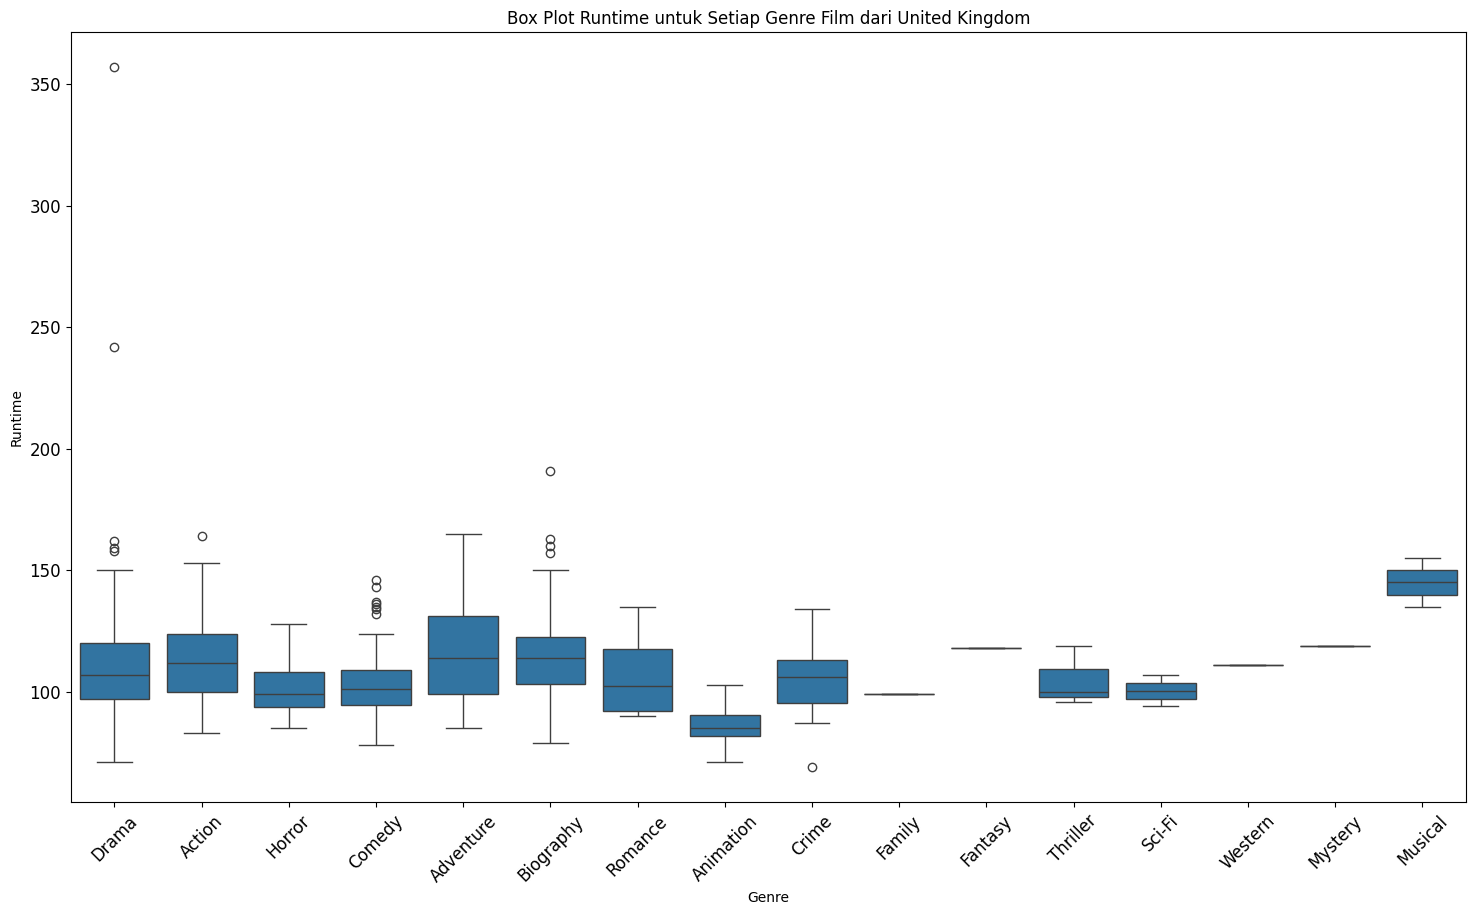

10 Film dengan Runtime Tertinggi dari United Kingdom:
                    name      genre  runtime
1218       Little Dorrit      Drama    357.0
2888              Hamlet      Drama    242.0
220               Gandhi  Biography    191.0
5303           Australia  Adventure    165.0
532   A Passage to India  Adventure    164.0

5 Film dengan Runtime Terendah dari United Kingdom:
                         name      genre  runtime
3318                Following      Crime     69.0
2381       Once Upon a Forest  Animation     71.0
4493                  9 Songs      Drama     71.0
4827                  Valiant  Animation     76.0
2236  Blame It on the Bellboy     Comedy     78.0


In [ ]:
uk_films = df[df['country'] == 'United Kingdom']

# Membuat box plot untuk runtime setiap genre
plt.figure(figsize=(18, 10))
sns.boxplot(x='genre', y='runtime', data=uk_films)
plt.title('Box Plot Runtime untuk Setiap Genre Film dari United Kingdom')
plt.xlabel('Genre')
plt.ylabel('Runtime')
plt.xticks(size=12, rotation=45)
plt.yticks(size=12)
plt.show()

# Data di bawah saya gunakan untuk mengecek apakah outliers valid atau tidak.

# Memeriksa 10 film dengan runtime tertinggi dari UK
top10 = uk_films.nlargest(5, 'runtime')[['name', 'genre', 'runtime']]
print("10 Film dengan Runtime Tertinggi dari United Kingdom:")
print(top10)

# Memeriksa 5 film dengan runtime terendah dari UK
bottom5 = uk_films.nsmallest(5, 'runtime')[['name', 'genre', 'runtime']]
print("\n5 Film dengan Runtime Terendah dari United Kingdom:")
print(bottom5)

Saya menggunakan box plot karena box plot berguna untuk melakukan pendeteksian ada tidaknya data ekstrim/outliers pada satu set data. Outliers di atas dikatakan sebagai outliers yg valid karena runtime dari semua data outliers tersebut masih mungkin terjadi di dunia nyata.

Contoh dari salah satu outliers, yaitu film Little Dorrit dari genre Drama dengan runtime 357, runtime sebuah film dengan durasi 357 menit tersebut masih mungkin terjadi di dunia nyata.

#### 2e. Buatlah visualisasi yang dapat membantu untuk melihat **korelasi** antara `score` dan `gross`. Berikan analisis dan pendapat anda berdasarkan visualisasi yang Anda buat.

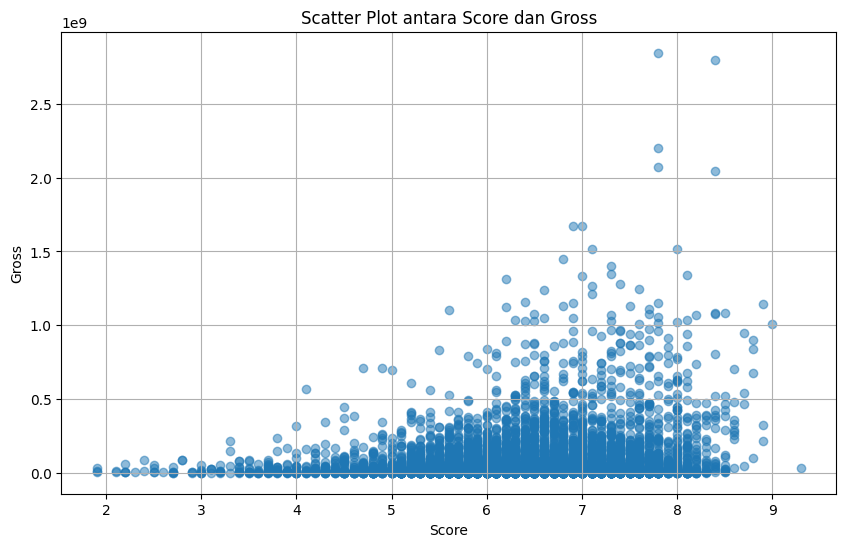

Koefisien Korelasi antara Score dan Gross: 0.18625781119363785


In [ ]:
# Membuat scatter plot untuk korelasi antara score dan gross
plt.figure(figsize=(10, 6))
plt.scatter(df['score'], df['gross'], alpha=0.5)
plt.title('Scatter Plot antara Score dan Gross')
plt.xlabel('Score')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

# Menghitung koefisien korelasi
correlation = df['gross'].corr(df['score'])
print("Koefisien Korelasi antara Score dan Gross:", correlation)

Saya menggunakan scatter plot karena memungkinkan kita untuk melihat hubungan antara dua variabel numerik dengan jelas. Dengan menempatkan score pada sumbu x dan gross pada sumbu y, kita dapat melihat seberapa tinggi korelasi serta memeriksa pola atau tren yang mungkin ada antara atribut score dengan gross untuk setiap film.

Berdasarkan scatter plot di atas kita bisa melihat ada beberapa data yang ketika score bernilai tinggi, maka gross nya juga ikut bernilai tinggi. Namun, tidak banyak. Setelah diperiksa lagi dengan menghitung nilai koefisien korelasinya, data tersebut memiliki nilai koefisien korelasi 0.186 yang menandakan bahwa memiliki very weak positive correlation.

#### 2f. Buatlah visualisasi yang dapat menunjukkan perbandingan **distribusi** nilai `score` dari film-film yang berasal dari Mexico dan Spain. Berikan analisis dan pendapat Anda mengenai perbandingan tersebut.

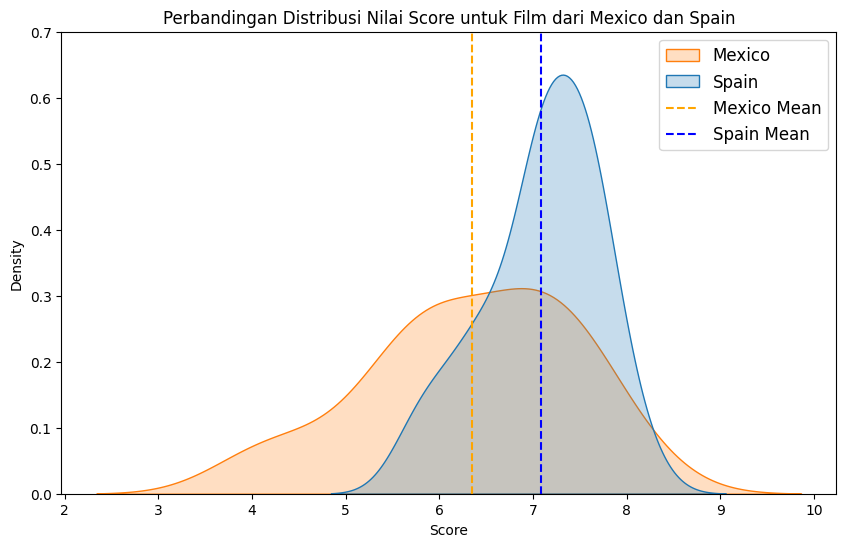

Deskripsi Statistik untuk Nilai Score Film dari Mexico:
              Measure     Value
0                Mean  6.345455
1              Median  6.400000
2                Mode  6.900000
3  Standard Deviation  1.064607
4            Variance  1.133388
5            Skewness -0.509965
6             Minimum  4.100000
7             Maximum  8.100000
Deskripsi Statistik untuk Nilai Score Film dari Spain:
              Measure     Value
0                Mean  7.085106
1              Median  7.100000
2                Mode  7.400000
3  Standard Deviation  0.611235
4            Variance  0.373608
5            Skewness -0.593437
6             Minimum  5.700000
7             Maximum  8.200000


In [ ]:
# Filter data untuk film-film dari Mexico dan Spain
film_mexico_spain = df[df['country'].isin(['Mexico', 'Spain'])]

# Membuat KDE plot untuk distribusi nilai score
plt.figure(figsize=(10, 6))
sns.kdeplot(data=film_mexico_spain, x='score', hue='country', fill=True, common_norm=False)
plt.title('Perbandingan Distribusi Nilai Score untuk Film dari Mexico dan Spain')
plt.xlabel('Score')
plt.ylabel('Density')

# Menambahkan rata-rata nilai score dari setiap negara
for country in ['Mexico', 'Spain']:
    mean_score = film_mexico_spain[film_mexico_spain['country'] == country]['score'].mean()
    plt.axvline(x=mean_score, color='orange' if country == 'Mexico' else 'blue', linestyle='--', label=f'{country} Mean: {mean_score:.2f}')

plt.legend(['Mexico','Spain', 'Mexico Mean', 'Spain Mean'], fontsize=12)
plt.ylim(0, 0.7)
plt.show()

# Tambahan deskripsi statistik untuk nilai score film dari Mexico dan Spain
for country in ['Mexico', 'Spain']:
    country_score = film_mexico_spain[film_mexico_spain['country'] == country]['score']
    stats = [
        ['Mean', np.mean(country_score)],
        ['Median', np.median(country_score)],
        ['Mode', country_score.mode().values[0]],
        ['Standard Deviation', np.std(country_score)],
        ['Variance', np.var(country_score)],
        ['Skewness', country_score.skew()],
        ['Minimum', np.min(country_score)],
        ['Maximum', np.max(country_score)],
    ]
    print(f"Deskripsi Statistik untuk Nilai Score Film dari {country}:")
    print(pd.DataFrame(stats, columns=['Measure', 'Value']))


Saya pilih menggunakan KDE Plot karena KDE Plot memberikan visualisasi yang efektif untuk menampilkan distribusi data secara keseluruhan. Dalam konteks ini, KDE plot memungkinkan kita untuk melihat bagaimana distribusi nilai score film dari Mexico dan Spain tersebar. Ini mempermudah untuk membandingkan dan memahami perbedaan distribusi score film antara kedua negara tersebut.

Dilihat dari KDE Plot, terdapat perbedaan yang signifikan dalam distribusi nilai score film antara Mexico dan Spain. Terlihat bahwa film-film dari Spain cenderung memiliki nilai score yang lebih tinggi dan lebih padat di kisaran nilai yang tinggi, sedangkan distribusi nilai score film dari Mexico lebih tersebar dan cenderung memiliki nilai yang lebih rendah secara umum. Rata-rata nilai score film dari Spain (7.085) lebih tinggi daripada rata-rata nilai score film dari Mexico (6.345). Selain itu, standar deviasi dan variansi dari nilai score film dari Mexico juga lebih tinggi, menunjukkan distribusi nilai score yang film Mexico lebih bervariasi dibandingkan dengan Spain. Bisa dilihat juga kedua grafik tersebut memiliki distribusi mendekati normal (bisa dilihat juga dari nilai skewness-nya yang 0.5).

#### 2g. Buatlah visualisasi untuk melihat korelasi antara rata-rata `score`, rata-rata `budget` dan rata-rata `votes` dari semua film di **setiap** negara.

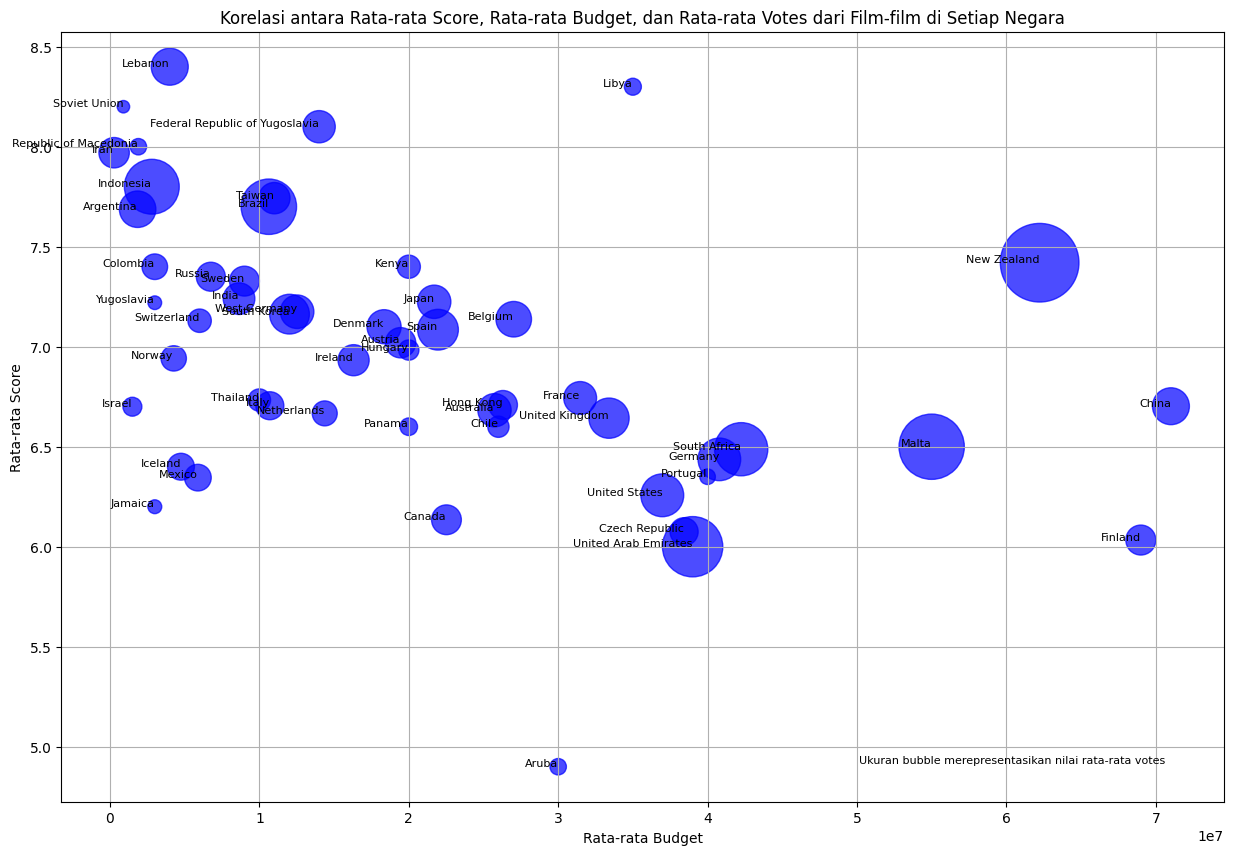

In [ ]:
# Menghitung rata-rata score, rata-rata budget, dan rata-rata votes untuk setiap negara
rata_setiapnegara = df.groupby('country')[['score', 'budget', 'votes']].mean()

# Membuat bubble plot untuk menampilkan korelasi antara rata-rata score, rata-rata budget, dan rata-rata votes
plt.figure(figsize=(15, 10))
plt.scatter(rata_setiapnegara['budget'], rata_setiapnegara['score'], s=rata_setiapnegara['votes']*0.01, alpha=0.7, c='blue')
plt.title('Korelasi antara Rata-rata Score, Rata-rata Budget, dan Rata-rata Votes dari Film-film di Setiap Negara')
plt.xlabel('Rata-rata Budget')
plt.ylabel('Rata-rata Score')
plt.grid(True)

# Menambahkan teks label untuk setiap negara
for i, country in enumerate(rata_setiapnegara.index):
    x = rata_setiapnegara['budget'][i]
    y = rata_setiapnegara['score'][i]
    if np.isfinite(x) and np.isfinite(y):
        plt.text(x, y, country, fontsize=8, ha='right')

# Menambahkan keterangan bahwa ukuran bubble direpresentasikan oleh rata-rata votes
plt.text(0.95, 0.05, 'Ukuran bubble merepresentasikan nilai rata-rata votes', fontsize=8, ha='right', transform=plt.gca().transAxes)

plt.show()

Saya menggunakan bubble plot karena bubble plot memberikan visualisasi yang efektif menampilkan hubungan antara 3 variabel secara bersamaan, dalam konteks ini 3 variabel tersebut adalah:
1. rata-rata score (direpresentasikan dengan posisi titik-titik pada sumbu y)
2. rata-rata budget (direpresentasikan dengan posisi titik-titik pada sumbu x)
3. rata-rata votes (direpresentasikan dengan ukuran/besar bubble)

# Sumber Data
- movies.csv: https://www.kaggle.com/datasets/danielgrijalvas/movies